## Results with 1% error rate
| Amount of wrong answers | where | result /100 | result/134|
| --- | --- | --- |--- |
| 4/20 | 1-4 | 5/100, with random branching (40): 16/100 |8/134|
| 4/20 | 17-20 | 80/100 | 108/134|
| 4/20 | randomly | 43/100 ||
| 3/20 | 1-3 | 24/100 ||
| 3/20 | 18-20 | 94/100 | 123/134||
| --- | --- | --- ||
| 5% Wrong Answer Rate| any | 106/130 ||

## Experiments
| N Wrong Answers| Wrong Questions |Number Of Itterations|
|--- | --- |---|
|N = 1 |X = {1}, {2}, {3}...{20} | 20|
|N = 2 |X = {1,2}, {2,3}, {3,4}...{19,20}|19|
|N = 3 |X = {1,2,3}, {4,5,6}...{18,19,20}|18|
|N = 4 |X = {1,2,3,4}...{17,18,19,20}|17|
|N = 5 |X = {1,2,3,4,5}...{16,17,18,19,20}|16|
|N = 6 |X = {1,2,3,4,5,6}...{15,16,17,18,19,20}|15|
 


# Curious Results
| Amount of wrong answers | where | result /100 | error rate|
| --- | --- | --- |--- |
| 4/20 | 1-4 | 34/134, if we match error rate|20%|
| 4/20 | 17-20 | 111/134, if we match error rate|20%|
| 4/20 | random | 61/134|10%|
|3/20|1-3|70/134|20% ER
|3/20|1-3|49/134|10% ER
|3/20|18-20|122/134|20% ER
|3/20|18-20|121/134|10% ER
|3/20|random|105/134|20% ER

In [10]:
import numpy as np
scale = 100/134
#RandomPatternBot

resultsSixWrongRandomly = [3 ,4 ,5 ,8 ,5 ,3 ,4 ,8 ,1 ,2 ] # sum 43
resultsFiveWrongRandomly =[30 ,29 ,24 ,29 ,33 ,27 ,22 ,17 ,24 ,22]
resultsFourWrongRandomly = [69,63,58,66,60,64,66,65,57,52] #sum 620
resultsThreeWrongRandomly = [101 ,98 ,97 ,101 ,110,110, 94 ,96 ,97 ,106] #sum 1010
resultsTwoWrongRandomly = [126 ,124 ,125 ,121 ,125 , 130 ,124 ,124 ,122 ,119] # sum 1240
resultsOneWrongRandomly = [131 ,127 ,130 ,133 ,130 ,134 ,133 ,134 ,131 ,129] #sum 1312
resultsZeroWrong=[134,134,134,134,134,134,134,134,134,134] # sum 1340

resultsSixWrongRandomly = np.divide(resultsSixWrongRandomly, scale)
resultsFiveWrongRandomly = np.divide(resultsFiveWrongRandomly, scale)
resultsFourWrongRandomly = np.divide(resultsFourWrongRandomly, scale)
resultsThreeWrongRandomly = np.divide(resultsThreeWrongRandomly, scale)
resultsTwoWrongRandomly = np.divide(resultsTwoWrongRandomly, scale)
resultsOneWrongRandomly = np.divide(resultsOneWrongRandomly, scale)
resultsZeroWrong = np.divide(resultsZeroWrong, scale)
PerformanceNWrongsRandom=[sum(resultsOneWrongRandomly)/10, sum(resultsTwoWrongRandomly)/10, sum(resultsThreeWrongRandomly)/10, sum(resultsFourWrongRandomly)/10, sum(resultsFiveWrongRandomly)/10, sum(resultsSixWrongRandomly)/10]
#CHUNKBOT

resultOneWrongCo=[130,124,131,129,133,134,133,130,132,132,134,133,131,133,131,134,134,134,134,134]
resultTwoWrongCo=[110, 108, 111,107,127,124,120,118,120,127,131,130,130,130,130,133,132,133,130]
resultThreeWrongCo= [62, 62, 62, 85, 100, 112, 109, 107, 111, 116, 124, 127, 123, 126, 127, 130, 129, 123] #last two not real
resultFourWrongCo=[17, 33, 36, 51, 73, 93, 88, 86, 80, 91, 112, 115, 114, 121, 120, 118, 110]
resultFiveWrongCo=[4, 16, 17, 27, 47, 64, 61, 50, 59, 64, 81, 93, 103, 103, 101, 95]
resultSixWrongCo=[0, 1, 5, 17, 15, 26, 26, 24, 26, 27, 42, 58, 75, 68, 69]
resultOneWrongCo= np.divide(resultOneWrongCo, scale)
resultTwoWrongCo= np.divide(resultTwoWrongCo, scale)
resultThreeWrongCo=  np.divide(resultThreeWrongCo, scale)
resultFourWrongCo= np.divide(resultFourWrongCo, scale)
resultFiveWrongCo= np.divide(resultFiveWrongCo, scale)
resultSixWrongCo= np.divide(resultsSixWrongCo, scale)

avgOverAll=[sum(resultOneWrongCo)/20, sum(resultTwoWrongCo)/19,sum(resultThreeWrongCo)/18,sum(resultFourWrongCo)/17,sum(resultFiveWrongCo)/16, sum(resultSixWrongCo)/15]

avgPerLocation = []
for i in range(15):
    avgPerLocation.append((resultOneWrongCo[i]+resultTwoWrongCo[i]+resultThreeWrongCo[i]+resultFourWrongCo[i]+resultFiveWrongCo[i]+ resultSixWrongCo[i])/6 )
avgPerLocation.append((resultOneWrongCo[i]+resultTwoWrongCo[i]+resultThreeWrongCo[i]+resultFourWrongCo[i]+resultFiveWrongCo[i])/5)
avgPerLocation.append((resultOneWrongCo[i]+resultTwoWrongCo[i]+resultThreeWrongCo[i]+resultFourWrongCo[i])/4)
avgPerLocation.append((resultOneWrongCo[i]+resultTwoWrongCo[i]+resultThreeWrongCo[i])/3)
avgPerLocation.append((resultOneWrongCo[i]+resultTwoWrongCo[i])/2)
avgPerLocation.append((resultOneWrongCo[i])/1)
#OnePlusNBOT
OnePlusZero=[130, 124, 131, 129, 133, 134, 133, 130, 132, 132, 134, 133, 131, 133, 131, 134, 134, 134, 134, 134]
OnePlusOne=[117,113,117,122,120,125,121,123,123,127,124,126,126,130,128,128,130,128, 129, 130] #missing 2 datapoints?
OnePlusTwo=[88,92,93,80,104,99,109,104,105,105,106,100,104,105,110,109,112,112,109,114]             
OnePlusThree=[43 ,51 ,49 ,57 ,52 ,51 ,62 ,64 ,61,67 ,67 ,67 ,64 ,57 ,73 ,57 ,70 ,72 ,74 ,80]
OnePlusFour=[14 , 21 ,15 ,15 ,17 ,24 ,22 ,30 ,23 ,24 ,20 ,27 ,27 ,30 ,34 ,35 ,26 ,33 ,31 ,34]
OnePlusFive=[1 ,2 ,4 ,5 ,2 ,3 ,4 ,6 ,5 ,4 ,7 ,5 ,8 ,5 ,10 ,5 ,2 ,6 ,4 ,9 ]
OnePlusZero = np.divide(OnePlusZero, scale)
OnePlusOne = np.divide(OnePlusOne, scale)
OnePlusTwo = np.divide(OnePlusTwo, scale)
OnePlusThree = np.divide(OnePlusThree, scale)
OnePlusFour = np.divide(OnePlusFour, scale)
OnePlusFive = np.divide(OnePlusFive, scale)


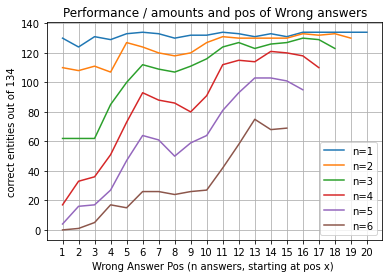

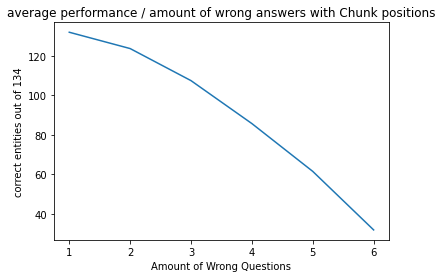

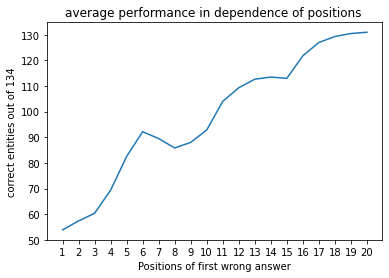

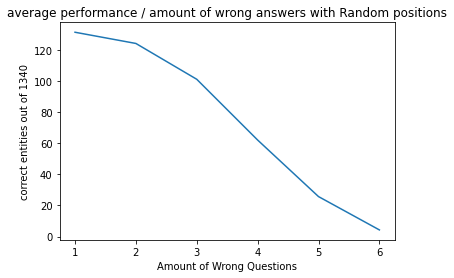

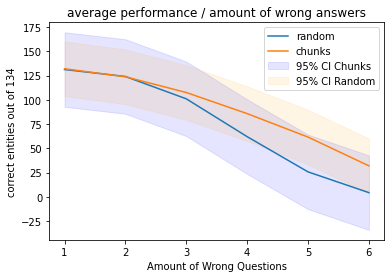

In [24]:

x = range(0,20)
x1 = range(0,19)
x2= range(0,18)
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
ax.plot(x, resultOneWrongCo,label="n=1")
ax.plot(x1, resultTwoWrongCo,label="n=2")
ax.plot(x2, resultThreeWrongCo,label="n=3")
ax.plot(range(0,17), resultFourWrongCo,label="n=4")
ax.plot(range(0,16), resultFiveWrongCo, label="n=5")
ax.plot(range(0,15), resultSixWrongCo, label="n=6")
#ax.plot(range(0,15), avgPerLocation, label="average")
ax.legend()
ax.set(xlabel='Wrong Answer Pos (n answers, starting at pos x) ', ylabel='correct entities out of 134',
       title='Performance / amounts and pos of Wrong answers',label = ["n", "j", "k", "l", "o"])
ax.grid()
labels=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
plt.xticks(x, labels)#, rotation=45)
#plt.savefig('PlotNPos.png')
plt.show()

fig1, ax1 = plt.subplots()
ax1.plot(range(0,len(avgOverAll)), avgOverAll)
ax1.set(xlabel='Amount of Wrong Questions', ylabel ='correct entities out of 134', title='average performance / amount of wrong answers with Chunk positions')
label = [1,2,3,4,5,6]
plt.xticks(range(0,6), label)
#plt.savefig('PlotAvgN.png')
plt.show()

fig2, ax2 = plt.subplots()
ax2.plot(range(0,20), avgPerLocation)
ax2.set(xlabel='Positions of first wrong answer', ylabel ='correct entities out of 134', title='average performance in dependence of positions ')
plt.xticks(x, labels)
#plt.savefig('PlotAvgPos.png')
plt.show()


fig3, ax3 = plt.subplots()
ax3.plot(range(0,len(PerformanceNWrongsRandom)),PerformanceNWrongsRandom)
ax3.set(xlabel='Amount of Wrong Questions', ylabel ='correct entities out of 1340', title='average performance / amount of wrong answers with Random positions')
plt.xticks(range(0,6), [1,2,3,4,5,6])
plt.show()

fig4, ax4 = plt.subplots()
ci = 1.96 * np.std(PerformanceNWrongsRandom)/np.sqrt(6)
ci2 = 1.96 * np.std(avgOverAll)/np.sqrt((6))
ax4.plot(range(0,len(PerformanceNWrongsRandom)),PerformanceNWrongsRandom, label = "random")
ax4.plot(range(0,len(avgOverAll)), avgOverAll, label = "chunks")
ax4.fill_between(range(6), (PerformanceNWrongsRandom-ci), (PerformanceNWrongsRandom+ci), color='b', alpha=.1, label = "95% CI Chunks")
ax4.fill_between(range(6), (avgOverAll-ci2), (avgOverAll+ci2), color='orange', alpha=.1,label = "95% CI Random")
ax4.set(xlabel='Amount of Wrong Questions', ylabel ='correct entities out of 134', title='average performance / amount of wrong answers')
ax4.legend()
plt.xticks(range(0,6), [1,2,3,4,5,6])
plt.show()

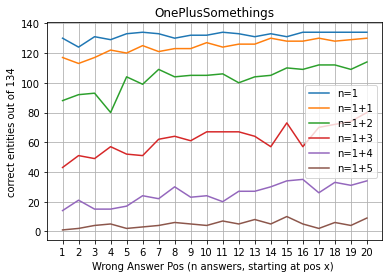

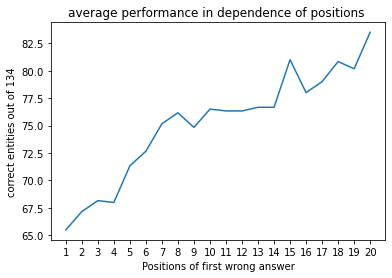

In [13]:
fig, ax = plt.subplots()
x = (range(0,20))
ax.plot(x, OnePlusZero,label="n=1")
ax.plot(x, OnePlusOne,label="n=1+1")
ax.plot(x, OnePlusTwo,label="n=1+2")
ax.plot(x, OnePlusThree,label="n=1+3")
ax.plot(x, OnePlusFour,label="n=1+4")
ax.plot(x, OnePlusFive, label="n=1+5")
#ax.plot(x, resultSixWrongCo, label="n=6")
#ax.plot(range(0,15), avgPerLocation, label="average")
ax.legend()
ax.set(xlabel='Wrong Answer Pos (n answers, starting at pos x) ', ylabel='correct entities out of 134',
       title='OnePlusSomethings',label = ["n", "j", "k", "l", "o"])
ax.grid()
labels=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
plt.xticks(x, labels)#, rotation=45)
#plt.savefig('PlotNPos.png')
plt.show()

avgPerLoc = []
for i in range(20):
    avgPerLoc.append((OnePlusZero[i]+OnePlusOne[i]+OnePlusTwo[i]+OnePlusThree[i]+OnePlusFour[i]+ OnePlusFive[i])/6 )
    
fig2, ax2 = plt.subplots()
ax2.plot(range(0,20), avgPerLoc)
ax2.set(xlabel='Positions of first wrong answer', ylabel ='correct entities out of 134', title='average performance in dependence of positions ')
plt.xticks(x, labels)
#plt.savefig('PlotAvgPos.png')
plt.show()


In [9]:
print(len(OnePlusOne))

18


In [16]:
#First 4 Questions answered wrong each time (5/100) /Instead with random branching: (16/100)


 <http://yago-knowledge.org/resource/David_Bowie>
Question: 1
Does the thing you are looking for have the attribute: hasOccupation Actor?
False
0.01
Question: 2
Does the thing you are looking for have the attribute: nationality United_States?
True
0.0001
Question: 3
Does the thing you are looking for have the attribute: memberOf Democratic_Party_(United_States)?
True
1.0000000000000002e-06
Question: 4
Does the thing you are looking for have the attribute: hasOccupation Politician?
True
1.0000000000000002e-08
Question: 5
Does the thing you are looking for have the attribute: award Presidential_Medal_of_Freedom?
False
9.900000000000001e-09
Question: 6
Does the thing you are looking for have the attribute: alumniOf Columbia_University?
False
9.801000000000001e-09
Question: 7
Does the thing you are looking for have the attribute: homeLocation San_Francisco?
False
9.702990000000001e-09
Question: 8
Does the thing you are looking for have the attribute: hasOccupation Statesman?
False
9.60596

In [34]:
#4 wrong per question, first 100 entities
from random import randint
import random
import math
import time 
wincount = 0
gamesplayed = 0
wrongAnswersPerQuestion = 4
totalgames = 100
Entrop_over_game = []
list_losses=[]
list_wins=[]

possibleObj, possiblePred, count = findSplits()
loadAllAttributes(possibleObj,possiblePred)
qres = loadSubjects()

while gamesplayed < totalgames:
    answerPattern, initilaizeCount = wrongAnswerList(wrongAnswersPerQuestion)
    Entropies=[]
    AttrHistory= ['<http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://example.com/popularEntity>']
    # Resets all variables
    i=0
    outofguess = []
    # pick subject
    #subject = pickSubject(qres)
    subject = allSubjects(qres, gamesplayed)
    print("\n" , subject)
    popularEntities =  popentities("\n".join(PosAttr),"")
    Distribution = prepareProps(popularEntities)
    
    while i < 20:

        # list of Pred and Obj for questions
        #listOfObj ,listOfPred = extractCountAndAttr(qres)

        # if only 1 popular entity is left break


        # ask question and add filters to query
        print('Question: %s' %(i+1))

        indexSplit, Entropy=determineBestSplit(possibleObj, possiblePred, count)
        Distribution = generateBotQuestionManipulate(possibleObj, possiblePred, indexSplit,subject, Distribution, i)
        i+=1
        Entropies.append(Entropy)
    # Prints answer
    #print(Distribution)
    highProb=-1
    for j in Distribution.values():
        if j > highProb:
            highProb=j
    answer = list(Distribution.keys())[list(Distribution.values()).index(highProb)]
    print("The Answer is: ", answer, "With a Probability of: ", highProb)
    print(subject)
    if str(answer.split("/")[-1] + ">") == str(subject.split("/")[-1]):
        wincount +=1
        list_wins.append(answerPattern)
    else:
        list_losses.append(answerPattern)
    gamesplayed+=1
    Entrop_over_game.append(Entropies)
    time.sleep(1)
    
print("\nTournament ended! I have guessed " + str(wincount) + " out of " + str(gamesplayed) + " things correctly.")


 <http://yago-knowledge.org/resource/David_Bowie>
Question: 1
Does the thing you are looking for have the attribute: hasOccupation Actor?
True
0.99
Question: 2
Does the thing you are looking for have the attribute: hasOccupation Film_producer?
False
0.9801
Question: 3
Does the thing you are looking for have the attribute: nationality United_States?
False
0.9702989999999999
Question: 4
Does the thing you are looking for have the attribute: nationality United_Kingdom?
True
0.96059601
Question: 5
Does the thing you are looking for have the attribute: award Order_of_the_British_Empire?
True
0.9509900498999999
Question: 6
Does the thing you are looking for have the attribute: hasOccupation Stage_actor?
wrong answer incoming
True
0.009509900499
Question: 7
Does the thing you are looking for have the attribute: award Academy_Award_for_Best_Supporting_Actress?
False
0.00941480149401
Question: 8
Does the thing you are looking for have the attribute: award Theatre_World_Award?
False
0.009320653

In [33]:
#without printing results # 3 wrong per question
from random import randint
import random
import math
import time 
wincount = 0
gamesplayed = 0
wrongAnswersPerQuestion = 3
totalgames = 100
Entrop_over_game = []
list_losses=[]
list_wins=[]

possibleObj, possiblePred, count = findSplits()
loadAllAttributes(possibleObj,possiblePred)
qres = loadSubjects()

while gamesplayed < totalgames:
    answerPattern, initilaizeCount = wrongAnswerList(wrongAnswersPerQuestion)
    Entropies=[]
    AttrHistory= ['<http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://example.com/popularEntity>']
    # Resets all variables
    i=0
    outofguess = []
    # pick subject
    #subject = pickSubject(qres)
    subject = allSubjects(qres, gamesplayed)
    print("\n" , subject)
    popularEntities =  popentities("\n".join(PosAttr),"")
    Distribution = prepareProps(popularEntities)
    
    while i < 20:

        # list of Pred and Obj for questions
        #listOfObj ,listOfPred = extractCountAndAttr(qres)

        # if only 1 popular entity is left break


        # ask question and add filters to query
        print('Question: %s' %(i+1))

        indexSplit, Entropy=determineBestSplit(possibleObj, possiblePred, count)
        Distribution = generateBotQuestionManipulate(possibleObj, possiblePred, indexSplit,subject, Distribution, i)
        i+=1
        Entropies.append(Entropy)
    # Prints answer
    #print(Distribution)
    highProb=-1
    for j in Distribution.values():
        if j > highProb:
            highProb=j
    answer = list(Distribution.keys())[list(Distribution.values()).index(highProb)]
    print("The Answer is: ", answer, "With a Probability of: ", highProb)
    print(subject)
    if str(answer.split("/")[-1] + ">") == str(subject.split("/")[-1]):
        wincount +=1
        list_wins.append(answerPattern)
    else:
        list_losses.append(answerPattern)
    gamesplayed+=1
    Entrop_over_game.append(Entropies)
    time.sleep(20)
    
print("\nTournament ended! I have guessed " + str(wincount) + " out of " + str(gamesplayed) + " things correctly.")


 <http://yago-knowledge.org/resource/David_Bowie>
Question: 1
Does the thing you are looking for have the attribute: hasOccupation Actor?
True
0.99
Question: 2
Does the thing you are looking for have the attribute: hasOccupation Film_producer?
False
0.9801
Question: 3
Does the thing you are looking for have the attribute: nationality United_States?
False
0.9702989999999999
Question: 4
Does the thing you are looking for have the attribute: nationality United_Kingdom?
True
0.96059601
Question: 5
Does the thing you are looking for have the attribute: award Order_of_the_British_Empire?
True
0.9509900498999999
Question: 6
Does the thing you are looking for have the attribute: hasOccupation Stage_actor?
wrong answer incoming
True
0.009509900499
Question: 7
Does the thing you are looking for have the attribute: award Academy_Award_for_Best_Supporting_Actress?
False
0.00941480149401
Question: 8
Does the thing you are looking for have the attribute: award Theatre_World_Award?
False
0.009320653

In [64]:
#4 Questions Wrong for each entitiy
from random import randint
import random
import math
import time 
wincount = 0
gamesplayed = 0
wrongAnswersPerQuestion = 4
totalgames = 100
Entrop_over_game = []

possibleObj, possiblePred, count = findSplits()
qres = loadSubjects()

while gamesplayed < totalgames:
    answerPattern, initilaizeCount = wrongAnswerList(wrongAnswersPerQuestion)
    Entropies=[]
    AttrHistory= ['<http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://example.com/popularEntity>']
    # Resets all variables
    i=0
    outofguess = []
    # pick subject
    #subject = pickSubject(qres)
    subject = allSubjects(qres, gamesplayed)
    print("\n" , subject)
    popularEntities =  popentities("\n".join(PosAttr),"")
    Distribution = prepareProps(popularEntities)
    
    while i < 20:

        # list of Pred and Obj for questions
        #listOfObj ,listOfPred = extractCountAndAttr(qres)

        # if only 1 popular entity is left break


        # ask question and add filters to query
        print('Question: %s' %(i+1))

        indexSplit, Entropy=determineBestSplit(possibleObj, possiblePred, count)
        Distribution = generateBotQuestionManipulate(possibleObj, possiblePred, indexSplit,subject, Distribution, i)
        i+=1
        Entropies.append(Entropy)
    # Prints answer
    #print(Distribution)
    highProb=-1
    for j in Distribution.values():
        if j > highProb:
            highProb=j
    answer = list(Distribution.keys())[list(Distribution.values()).index(highProb)]
    print("The Answer is: ", answer, "With a Probability of: ", highProb)
    print(subject)
    if str(answer.split("/")[-1] + ">") == str(subject.split("/")[-1]):
        wincount +=1
    gamesplayed+=1
    Entrop_over_game.append(Entropies)
    time.sleep(20)
    
print("\nTournament ended! I have guessed " + str(wincount) + " out of " + str(gamesplayed) + " things correctly.")


 <http://yago-knowledge.org/resource/David_Bowie>
Question: 1
Does the thing you are looking for have the attribute: hasOccupation Songwriter?
True
0.99
Question: 2
Does the thing you are looking for have the attribute: hasOccupation Film_producer?
False
0.9801
Question: 3
Does the thing you are looking for have the attribute: nationality United_States?
wrong answer incoming
True
0.009801
Question: 4
Does the thing you are looking for have the attribute: hasOccupation Actor?
wrong answer incoming
False
9.801e-05
Question: 5
Does the thing you are looking for have the attribute: award Presidential_Medal_of_Freedom?
False
9.70299e-05
Question: 6
Does the thing you are looking for have the attribute: hasOccupation Dancer?
wrong answer incoming
True
9.70299e-07
Question: 7
Does the thing you are looking for have the attribute: award Nickelodeon_Kids'_Choice_Awards?
False
9.6059601e-07
Question: 8
Does the thing you are looking for have the attribute: award MTV_Video_Music_Award_for_Video_

In [14]:
#10 runs, only david bowie, 20% wrong
from random import randint
import random
import math
import time 
wincount = 0
gamesplayed = 0
totalgames = 10

possibleObj, possiblePred, count = findSplits()
qres = loadSubjects()
while gamesplayed < totalgames:
    AttrHistory= ['<http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://example.com/popularEntity>']

    # Resets all variables
    i=0
    outofguess = []
    # pick subject
    #subject = pickSubject(qres)
    
    subject = allSubjects(qres, 0)
    print("\n" , subject)
    popularEntities =  popentities("\n".join(PosAttr),"")
    Distribution = prepareProps(popularEntities)
    
    while i < 20:

        # list of Pred and Obj for questions
        #listOfObj ,listOfPred = extractCountAndAttr(qres)

        # if only 1 popular entity is left break


        # ask question and add filters to query
        print('Question: %s' %(i+1))

        indexSplit=determineBestSplit(possibleObj, possiblePred, count)
        Distribution = generateBotQuestion(possibleObj, possiblePred, indexSplit,subject, Distribution)
        i+=1

    # Prints answer
    #print(Distribution)
    highProb=-1
    for j in Distribution.values():

        if j > highProb:
            highProb=j
    answer = list(Distribution.keys())[list(Distribution.values()).index(highProb)]
    print("The Answer is: ", answer, "With a Probability of: ", highProb)
    print(subject)
    if str(answer.split("/")[-1] + ">") == str(subject.split("/")[-1]):
        wincount +=1
    gamesplayed+=1
    time.sleep(5)
print("\nTournament ended! I have guessed " + str(wincount) + " out of " + str(gamesplayed) + " things correctly.")


 <http://yago-knowledge.org/resource/David_Bowie>
Question: 1
Does the thing you are looking for have the attribute: hasOccupation Film_producer?
False
0.99
Question: 2
Does the thing you are looking for have the attribute: award Presidential_Medal_of_Freedom?
False
0.9801
Question: 3
Does the thing you are looking for have the attribute: hasOccupation Politician?
False
0.9702989999999999
Question: 4
Does the thing you are looking for have the attribute: hasOccupation Poet?
False
0.96059601
Question: 5
Does the thing you are looking for have the attribute: hasOccupation Film_director?
False
0.9509900498999999
Question: 6
Does the thing you are looking for have the attribute: knowsLanguage English_language?
True
0.9414801494009999
Question: 7
Does the thing you are looking for have the attribute: knowsLanguage German_language?
False
haha fooled!
0.009414801494009998
Question: 8
Does the thing you are looking for have the attribute: award MTV_Video_Music_Award_for_Best_Pop_Video?
False


In [12]:
#RESULTS 5% Error Rate, All entities once
from random import randint
import random
import math
import time 
wincount = 0
gamesplayed = 0
totalgames = 130

possibleObj, possiblePred, count = findSplits()
qres = loadSubjects()
while gamesplayed < totalgames:
    AttrHistory= ['<http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://example.com/popularEntity>']

    # Resets all variables
    i=0
    outofguess = []
    # pick subject
    #subject = pickSubject(qres)
    
    subject = allSubjects(qres, gamesplayed)
    print("\n" , subject)
    popularEntities =  popentities("\n".join(PosAttr),"")
    Distribution = prepareProps(popularEntities)
    
    while i < 20:

        # list of Pred and Obj for questions
        #listOfObj ,listOfPred = extractCountAndAttr(qres)

        # if only 1 popular entity is left break


        # ask question and add filters to query
        print('Question: %s' %(i+1))

        indexSplit=determineBestSplit(possibleObj, possiblePred, count)
        Distribution = generateBotQuestion(possibleObj, possiblePred, indexSplit,subject, Distribution)
        i+=1

    # Prints answer
    #print(Distribution)
    highProb=-1
    for j in Distribution.values():

        if j > highProb:
            highProb=j
    answer = list(Distribution.keys())[list(Distribution.values()).index(highProb)]
    print("The Answer is: ", answer, "With a Probability of: ", highProb)
    print(subject)
    if str(answer.split("/")[-1] + ">") == str(subject.split("/")[-1]):
        wincount +=1
    gamesplayed+=1
    time.sleep(60)
print("\nTournament ended! I have guessed " + str(wincount) + " out of " + str(gamesplayed) + " things correctly.")


 <http://yago-knowledge.org/resource/David_Bowie>
Question: 1
Does the thing you are looking for have the attribute: hasOccupation Actor?
True
0.99
Question: 2
Does the thing you are looking for have the attribute: hasOccupation Businessperson?
False
haha fooled!
0.0099
Question: 3
Does the thing you are looking for have the attribute: homeLocation New_York_City?
False
0.009801
Question: 4
Does the thing you are looking for have the attribute: memberOf Democratic_Party_(United_States)?
False
0.00970299
Question: 5
Does the thing you are looking for have the attribute: award Grammy_Award_for_Best_Rap%2FSung_Performance?
False
0.0096059601
Question: 6
Does the thing you are looking for have the attribute: award MTV_Video_Music_Award_for_Best_Female_Video?
False
0.009509900499
Question: 7
Does the thing you are looking for have the attribute: hasOccupation Screenwriter?
False
0.00941480149401
Question: 8
Does the thing you are looking for have the attribute: knowsLanguage French_language

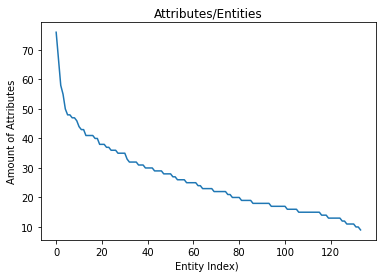

12.114606892340202
146.76370015593673
25.813432835820894
23.0


In [27]:
CountOfAttrPerEnt = [76, 67, 58, 55, 50, 48, 48, 47, 47, 46, 44, 43, 43, 41, 41, 41, 41, 40, 40, 38, 38, 38, 37, 37, 36, 36, 36, 35, 35, 35, 35, 33, 32, 32, 32, 32, 31, 31, 31, 30, 30, 30, 30, 29, 29, 29, 29, 28, 28, 28, 28, 27, 27, 26, 26, 26, 26, 25, 25, 25, 25, 25, 24, 24, 23, 23, 23, 23, 23, 22, 22, 22, 22, 22, 22, 21, 21, 20, 20, 20, 20, 19, 19, 19, 19, 19, 18, 18, 18, 18, 18, 18, 18, 18, 17, 17, 17, 17, 17, 17, 17, 16, 16, 16, 16, 16, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 14, 14, 14, 13, 13, 13, 13, 13, 13, 12, 12, 11, 11, 11, 11, 10, 10, 9]

fig, ax = plt.subplots()
ax.plot(range(0,len(CountOfAttrPerEnt)), CountOfAttrPerEnt)
ax.set(xlabel='Entity Index) ', ylabel='Amount of Attributes',
       title='Attributes/Entities')
plt.savefig("attributesEntitiy.png")
plt.show()
print(np.std(CountOfAttrPerEnt))
print(np.var(CountOfAttrPerEnt))
print(np.mean(CountOfAttrPerEnt))
print(np.median(CountOfAttrPerEnt))